# Python for Data Science 2022
_Author: Satchit Chatterji (satchit.chatterji@gmail.com)_

## Case Study 4: Clustering Movies
> Today's question: **How can I know what movies are similar without having watched them?**

This notebook shows a limited real-world use case of K-means clustering: namely, given a dataset of movies and their (possibly multiple valid) genres, cluster them with other movies with similar genres. This may be helpful, for example, as a filter to automatically group similar movies together, or as a movie recommendation system.

#### Learning outcomes:
- Clean and preprocess dataset
- Data exploration
- One-hot encoding
- Use K-means
    - Use sklear's KMeans class
    - Elbow method
- Analysis of clusters

First, we load the data and do what we usually do when we load data!

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

We first should process the strings in the genre column to a list of useful genre names (we don't really care about the ids for now).

In [6]:
def process_genre_string(gs):
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    return gs

processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

df["proc_genres"] = processed_genres

In [7]:
df[["proc_genres", "title"]]

,proc_genres,title
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar
1,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End
2,"[Action, Adventure, Crime]",Spectre
3,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises
4,"[Action, Adventure, Science Fiction]",John Carter
...,...,...
4798,"[Action, Crime, Thriller]",El Mariachi
4799,"[Comedy, Romance]",Newlyweds
4800,"[Comedy, Drama, Romance, TV Movie]","Signed, Sealed, Delivered"
4801,[],Shanghai Calling


### A little exploration to understand our data
1. Unique labels?
2. Histogram of genres in dataset?
3. ...?

In [8]:
all_genres = []
for genres in df["proc_genres"]:
    all_genres += genres

print(set(all_genres))

{'Fantasy', 'TV Movie', 'Comedy', 'Romance', 'Drama', 'Documentary', 'History', 'Action', 'Mystery', 'War', 'Adventure', 'Science Fiction', 'Western', 'Family', 'Crime', 'Horror', 'Foreign', 'Animation', 'Thriller', 'Music'}


In [9]:
genre_counts = {genre:all_genres.count(genre) for genre in set(all_genres)}
genre_counts

{'Fantasy': 424,
 'TV Movie': 8,
 'Comedy': 1722,
 'Romance': 894,
 'Drama': 2297,
 'Documentary': 110,
 'History': 197,
 'Action': 1154,
 'Mystery': 348,
 'War': 144,
 'Adventure': 790,
 'Science Fiction': 535,
 'Western': 82,
 'Family': 513,
 'Crime': 696,
 'Horror': 519,
 'Foreign': 34,
 'Animation': 234,
 'Thriller': 1274,
 'Music': 185}

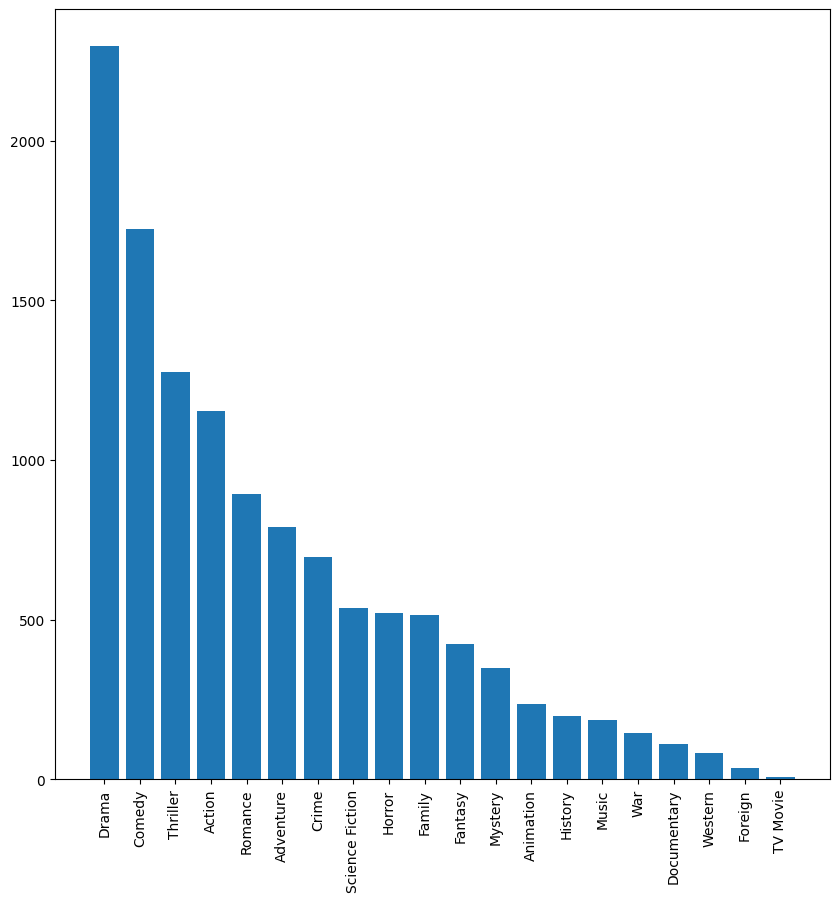

In [10]:
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))
xs = list(range(len(genre_counts)))
plt.figure(figsize=(10,10))
plt.bar(xs, genre_counts.values())
plt.xticks(xs, labels=genre_counts.keys(), rotation=90)
plt.show()

#### One-hot encoding

Since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. If $M_3$ is tagged with both $G_1$ and $G_3$, the encoding is $[1,0,1]$. Thus, with these new vectors, we can find similar groupings. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks.

In [11]:
genres = sorted(genre_counts.keys())

def encode_labels(this_labels, all_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
    """
    out = np.zeros(len(all_labels))
    for label in this_labels:
        out[all_labels.index(label)] = 1
    return out

enocded_labels = []
for index, row in df.iterrows():
    enocded_labels.append(encode_labels(row["proc_genres"], genres))

df["encoded_labels"] = enocded_labels

In [12]:
df['encoded_labels']

0       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
1       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2       [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
3       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...
4       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4798    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4800    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
4801    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4802    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
Name: encoded_labels, Length: 4803, dtype: object

### Scikit-Learn's K-Means

Luckily for us, we don't need to implement K-means ourselves -- sklearn has it for us. It is used like this:

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8) # arbitrary choice for now
kmeans = kmeans.fit(df['encoded_labels'].tolist())

How many clusters to choose?
> Q) What method did we just use to find a good choice for a number of clusters?

In [14]:
distances = []
cluster_sizes = range(1, 50)
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(df['encoded_labels'].tolist())
    distances.append(kmeans.inertia_)

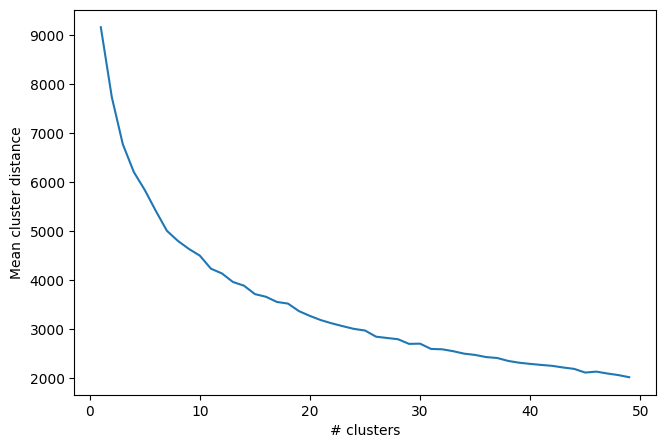

In [15]:
plt.figure(figsize=(7.5,5))
plt.ylabel("Mean cluster distance")
plt.xlabel("# clusters")

plt.plot(list(cluster_sizes), distances)
plt.show()

We don't seem to have a well-defined 'elbow' here. This is common in real world datasets. There can be a few reasons:
- There are no 'true' or clear groupings
- Euclidean distances may not represent groupings well
- One-hot encoding may not be the best representation
- Any grouping may be good enough, depending on the use case.

A note on the last point: for example, if you wish to create a movie recommender system for a entertainment platform, perhaps a larger grouping may be useful when you have less data about a customer -- more groups will have a larger diversity (in general), and shift to smaller and smaller groupings when you have more data. Perhaps you need an entierly different clustering system entirely -- this is all up to you and your project/research.

For now, we will assume ~14 groups, and print out the clusters of movies. Does this clustering match up with your intuition for similar movies?

> Q) Is 14 a good cluster size? Explore the clusters and see if there are similar that can be merged, or clusters that can be split.

In [16]:
kmeans = KMeans(14)
kmeans.fit(df['encoded_labels'].tolist())
y_preds = kmeans.predict(df['encoded_labels'].tolist())
df["Cluster"] = y_preds
df.loc[df["Cluster"]==12][["title", "proc_genres"]]

,title,proc_genres
77,Inside Out,"[Drama, Comedy, Animation, Family]"
298,The Wolf of Wall Street,"[Crime, Drama, Comedy]"
349,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama, Fantasy]"
406,Arthur Christmas,"[Drama, Animation, Family, Comedy]"
434,The Longest Yard,"[Comedy, Drama]"
...,...,...
4754,The Naked Ape,"[Drama, Comedy, Family]"
4770,Mutual Appreciation,"[Drama, Comedy]"
4772,Down Terrace,"[Drama, Action, Comedy]"
4775,Funny Ha Ha,"[Drama, Comedy]"
